<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plotArrays(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()

<a id="tercero"></a>
## 3. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de características extraídas. Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
sio.loadmat("file.mat")
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

### a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [3]:
import scipy.io as sio
mat_train = sio.loadmat("./eventrain.mat")
mat_test = sio.loadmat("./eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]
row=len(data_train)
columns=len(data_train[0])
row2=len(data_test)
columns2=len(data_test[0])
print("La cantidad de datos en el conjunto de entrenamiento es ",(columns*row))
print("La cantidad de datos en el conjunto de test es ",(columns2*row2))

La cantidad de datos en el conjunto de entrenamiento es  38500
La cantidad de datos en el conjunto de test es  11550


### b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilizados.

> Para el problema de clasificación se utilizo la representación de genFeat, donde se tienen 14 caracteristicas contextuales computadas:

In [4]:
#Representaciones
genFeat_train = data_train[0]
genFeat_test = data_test[0]
ageClass_train = data_train[1]
ageClass_test = data_test[1]
ffcoefs_train = data_train[3]
ffcoefs_test = data_test[3]
faceGist_train = data_train[4]
faceGist_test = data_test[4]

x_df = pd.DataFrame(genFeat_train, columns=["xcenter", "ycenter", "minSpanningTreeDegree", "SizeRelativeToNeighbor", "PosX", "PosY", "neiAngle", "myAngle","SizeRelAverage", "x of [x y] position relative average.", "y of [x y] position relative average.", "Size Relative to Planar FaceFit.", "Nearest Neighbor Gender   (NOT USED IN CVPR 09)","NEarest Neighbor Agebin   (NOT USED IN CVPR 09)"])
x_test = pd.DataFrame(genFeat_test, columns=["xcenter", "ycenter", "minSpanningTreeDegree", "SizeRelativeToNeighbor", "PosX", "PosY", "neiAngle", "myAngle","SizeRelAverage", "x of [x y] position relative average.", "y of [x y] position relative average.", "Size Relative to Planar FaceFit.", "Nearest Neighbor Gender   (NOT USED IN CVPR 09)","NEarest Neighbor Agebin   (NOT USED IN CVPR 09)"])
x_df

,xcenter,ycenter,minSpanningTreeDegree,SizeRelativeToNeighbor,PosX,PosY,neiAngle,myAngle,SizeRelAverage,x of [x y] position relative average.,y of [x y] position relative average.,Size Relative to Planar FaceFit.,Nearest Neighbor Gender (NOT USED IN CVPR 09),NEarest Neighbor Agebin (NOT USED IN CVPR 09)
0,42.0,34.0,3.0,0.983870,6.000000,-0.363636,0.179853,-0.000000,1.042869,-3.495982,0.118508,1.043751,1.0,5.0
1,60.0,12.0,1.0,0.913500,1.772727,-8.954545,0.083141,-0.000000,1.042869,5.226197,-7.845221,0.987666,1.0,6.0
2,29.0,35.0,2.0,1.234662,1.431084,-4.606300,-0.110657,0.179853,1.059967,-9.753198,0.497733,1.063739,1.0,1.0
3,37.0,13.0,1.0,0.913625,-2.537345,-7.811042,-0.000000,-0.099669,0.952791,-5.913543,-7.323786,0.905542,2.0,6.0
4,56.0,37.0,3.0,1.094690,6.020797,1.204159,-0.000000,0.083141,1.141619,3.377474,1.493199,1.153894,2.0,6.0
5,72.0,37.0,2.0,1.214747,0.000000,-4.772727,-0.110657,-0.000000,1.042869,10.914575,1.350990,1.053005,2.0,1.0
6,72.0,51.0,1.0,0.823217,0.000000,5.797655,-0.000000,-0.110657,0.858508,10.914575,6.328320,0.899042,1.0,5.0
7,26.0,48.0,1.0,0.809938,-1.766904,5.687224,0.179853,-0.110657,0.858508,-11.270099,5.380257,0.892727,1.0,5.0
8,21.0,27.0,1.0,1.012220,-2.325511,-4.516857,-0.090660,-0.179853,1.190565,-16.866146,-5.009746,0.936988,1.0,6.0
9,86.0,29.0,1.0,1.325178,3.958333,-3.958333,0.110657,-0.000000,1.277848,17.795490,-4.264335,1.038596,1.0,5.0


> Ahora se reparte el set de training en train y validation set, cada una con un 60% y 40% de los datos respectivamente, de manera tal que la proporción de las clases quede intacta.

In [7]:
y_df = pd.DataFrame(ageClass_train, columns = ["target"])
classes = np.array([1, 5, 10, 16, 28, 51, 75])

df = pd.concat([x_df, y_df], axis=1)

x_train = dict()
x_val = dict()
y_train = dict()
y_val = dict()

for i in range(7):
    df_class = df.query("target == "+str(classes[i]))
    n = len(df_class.index)
    x_train[i] = df_class.loc[:int(0.6*n)]
    x_val[i] = df_class.loc[int(0.6*n):]
    y_train[i] = x_train[i].pop('target')
    y_val[i] = x_val[i].pop('target')
    
x_train = pd.concat(x_train.values(), axis=0).values
x_val = pd.concat(x_val.values(), axis=0).values
y_train = pd.concat(y_train.values(), axis=0).values
y_val = pd.concat(y_val.values(), axis=0).values
y_test = ageClass_test
x_test = pd.DataFrame(genFeat_test, dtype = np.float64).values

### c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.


### Problema como tarea de clasificación

In [8]:
y_train_class = np.copy(y_train)
y_val_class = np.copy(y_val)
y_test_class = np.copy(y_test)
#Traducción a clases
classes = np.array([1, 5, 10, 16, 28, 51, 75])
for i in range(7):
    y_train_class[y_train_class == classes[i]] = i
    y_val_class[y_val_class == classes[i]] = i
    y_test_class[y_test_class == classes[i]] = i
    
y_train_onehot = keras.utils.to_categorical(y_train_class,num_classes=7)
y_val_onehot = keras.utils.to_categorical(y_val_class,num_classes=7)
y_test_onehot = keras.utils.to_categorical(y_test_class,num_classes=7)

ffw_network = keras.models.Sequential()
ffw_network.add(Dense(units = 50, kernel_initializer='glorot_uniform', input_dim = x_train.shape[1] ,activation = "relu"))
ffw_network.add(Dense(units = 10,kernel_initializer='glorot_uniform', activation = "relu"))
ffw_network.add(Dense(units = 7, kernel_initializer='glorot_uniform', activation = "softmax"))

ffw_network.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics = [keras.metrics.categorical_accuracy])

history = ffw_network.fit(x_train, y_train_onehot, epochs = 50, verbose =1, validation_data=(x_val, y_val_onehot))

Train on 301 samples, validate on 3200 samples
Epoch 1/50
301/301 [==============================] - 0s - loss: 8.1268 - categorical_accuracy: 0.0831 - val_loss: 3.0912 - val_categorical_accuracy: 0.1706
Epoch 2/50
301/301 [==============================] - 0s - loss: 2.5235 - categorical_accuracy: 0.2226 - val_loss: 3.3520 - val_categorical_accuracy: 0.1475
Epoch 3/50
301/301 [==============================] - 0s - loss: 2.1703 - categorical_accuracy: 0.3123 - val_loss: 3.1132 - val_categorical_accuracy: 0.1503
Epoch 4/50
301/301 [==============================] - 0s - loss: 1.9253 - categorical_accuracy: 0.3422 - val_loss: 3.0392 - val_categorical_accuracy: 0.1541
Epoch 5/50
301/301 [==============================] - 0s - loss: 1.8064 - categorical_accuracy: 0.3322 - val_loss: 2.6871 - val_categorical_accuracy: 0.1697
Epoch 6/50
301/301 [==============================] - 0s - loss: 1.7162 - categorical_accuracy: 0.3256 - val_loss: 2.7031 - val_categorical_accuracy: 0.1519
Epoch 7/50


In [11]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
y_aprox_class = ffw_network.predict_classes(x_test)

y_aprox = np.copy(y_aprox_class)
for i in range(7):
    y_aprox[y_aprox == i] = classes[i]

print("\nEl error cuadratico medio es:", mse(y_aprox, y_test))

  32/1050 [..............................] - ETA: 0s
El error cuadratico medio es: 1176.9


In [13]:
result = pd.DataFrame(history.history)
result.to_csv("history3c-classification.csv")

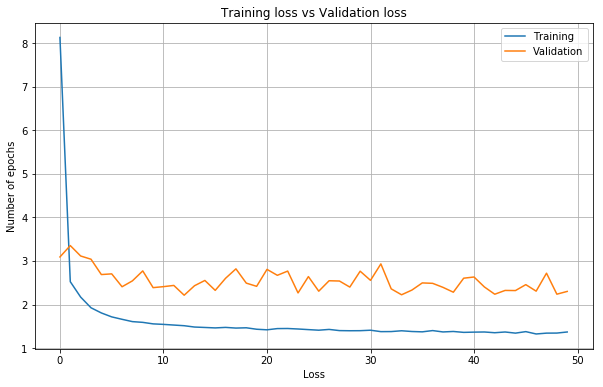

In [15]:
history3c = pd.read_csv("history3c-classification.csv")
train_loss = history3c['loss']
val_loss = history3c['val_loss']
plotArrays(train_loss, val_loss, 50, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

### Problema como tarea de regresión

In [16]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

ffw2 = keras.models.Sequential()
ffw2.add(Dense(256, kernel_initializer='uniform',input_dim=x_train_scaled.shape[1], activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
ffw2.compile(loss='mean_squared_error', optimizer = "rmsprop", metrics = ["accuracy"])
history = ffw2.fit(x_train_scaled, y_train, epochs = 32, verbose =1, validation_data = (x_val_scaled, y_val))

Train on 301 samples, validate on 3200 samples
Epoch 1/32
301/301 [==============================] - 0s - loss: 1655.1363 - acc: 0.0166 - val_loss: 1161.3852 - val_acc: 0.0128
Epoch 2/32
301/301 [==============================] - 0s - loss: 1384.3221 - acc: 0.0199 - val_loss: 936.0609 - val_acc: 0.0366
Epoch 3/32
301/301 [==============================] - 0s - loss: 1013.5985 - acc: 0.0133 - val_loss: 719.2922 - val_acc: 0.0253
Epoch 4/32
301/301 [==============================] - 0s - loss: 679.4247 - acc: 0.0133 - val_loss: 630.0632 - val_acc: 0.0209
Epoch 5/32
301/301 [==============================] - 0s - loss: 493.4060 - acc: 0.0199 - val_loss: 640.7114 - val_acc: 0.0103
Epoch 6/32
301/301 [==============================] - 0s - loss: 413.6767 - acc: 0.0166 - val_loss: 685.1341 - val_acc: 0.0053
Epoch 7/32
301/301 [==============================] - 0s - loss: 393.5505 - acc: 0.0066 - val_loss: 702.7679 - val_acc: 0.0063
Epoch 8/32
301/301 [==============================] - 0s - l

In [17]:
ffw2.evaluate(x_test_scaled, y_test)

  32/1050 [..............................] - ETA: 0s

[641.7743130347842, 0.011428571428571429]

In [18]:
result = pd.DataFrame(history.history)
result.to_csv("history3c-reg.csv")

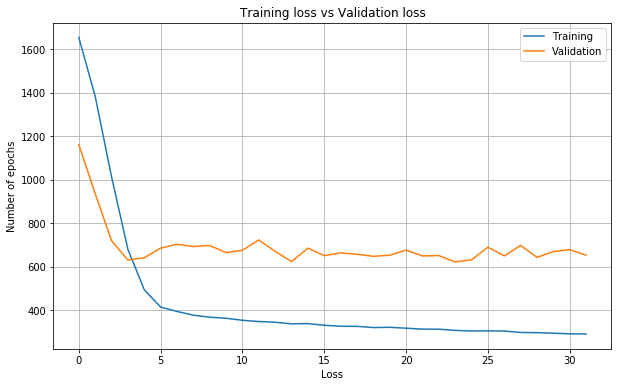

In [19]:
history3c = pd.read_csv("history3c-reg.csv")
train_loss = history3c['loss']
val_loss = history3c['val_loss']
plotArrays(train_loss, val_loss, 32, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

> Podemos notar que alcanzamos un mse menor al usar regresión lineal, pero esta aunque mejorará sus resultados en training, su error de validación se mantiene más o menos constante.